# Targeted EC-Earth driven evaluation


In [3]:
import valenspy as vp
from valenspy._utilities import load_yml
from valenspy.processing.select import select_point
from valenspy.diagnostic.functions import mean_bias, mean_absolute_error, root_mean_square_error, spearman_correlation, perkins_skill_score, time_series_spatial_mean
from valenspy.diagnostic.visualizations import plot_time_series, plot_map
from pathlib import Path

import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import pandas as pd

from eval_gcm_functions import *

# define machine name - used for paths of (observational) datasets
machine = 'hortense'

manager = vp.InputManager(machine=machine)

## Point extraction from Ijsselmeer to check spin-up in BE28 run

In [4]:
# Define datasets
gcm = 'EC-Earth'
domain = 'BEL28'
model = "CCLM"
experiment_type = "test"
experiment = f"CB2_{model}_{domain}_{gcm}_{experiment_type}"

experiment_era5 = f"CB2_{model}_{domain}_ERA5_evaluation"

figdir = "../../output/figures_gcm_evaluation/"
figdir_exp = figdir + f"{experiment}/"
Path(figdir_exp).mkdir(parents=True, exist_ok=True)

/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/CB2_CCLM_BEL28_EC-Earth_test/T_S/daily/T_S_daily_mean_1995.nc
['/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/CB2_CCLM_BEL28_ERA5_evaluation/T_S/daily/T_S_daily_mean_1982.nc', '/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/CB2_CCLM_BEL28_ERA5_evaluation/T_S/daily/T_S_daily_mean_1983.nc', '/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/CB2_CCLM_BEL28_ERA5_evaluation/T_S/daily/T_S_daily_mean_1984.nc', '/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/CB2_CCLM_BEL28_ERA5_evaluation/T_S/daily/T_S_daily_mean_1985.nc', '/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/CB2_CCLM_BEL28_ERA5_evaluation/T_S/daily/T_S_daily_mean_1986.nc', '/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/CB2_CCLM_BEL28_ERA5_evaluation/T_S/daily/T_S_daily_mean

Text(0.5, 1.0, 'Surface temperature in Ijsselmeer point')

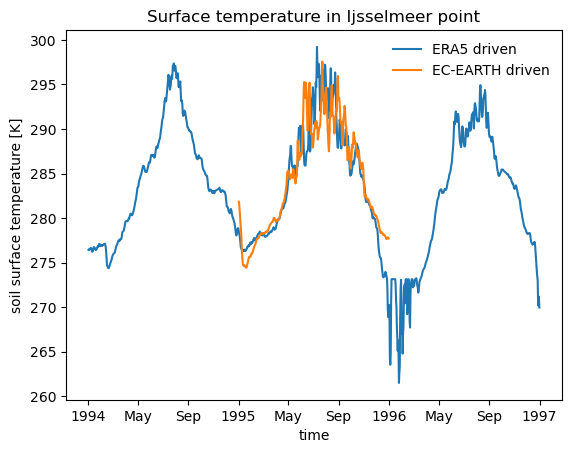

In [26]:
variable = "T_S" #"T_2M" #
daily_statistic = "mean"

# load and preprocess experiments

da_exp  = load_gcm_experiment(experiment,variable,daily_statistic)
da_eval = load_era5_experiment(experiment_era5,variable,daily_statistic)


rlat_rlon_ijsselmeer = [46.3708,-0.482538]

da_exp_point = da_exp.sel(
            rlat=rlat_rlon_ijsselmeer[0], rlon=rlat_rlon_ijsselmeer[1], method="nearest")
da_eval_point = da_eval.sel(
            rlat=rlat_rlon_ijsselmeer[0], rlon=rlat_rlon_ijsselmeer[1], method="nearest")         

x,y=155,243
da_exp_point = da_exp.isel(
            rlat=y, rlon=x)
da_eval_point = da_eval.isel(
            rlat=y, rlon=x)     

fig,ax = plt.subplots()
da_eval_point.sel(time=slice("1994-01-01","1996-12-31")).plot(ax=ax, label="ERA5 driven")
da_exp_point.sel(time=slice("1994-01-01","1996-12-31")).plot(ax =ax, label="EC-EARTH driven")

ax.legend(frameon=False)
ax.set_title("Surface temperature in Ijsselmeer point")

Text(0.5, 1.0, '2m temperature in Ijsselmeer point')

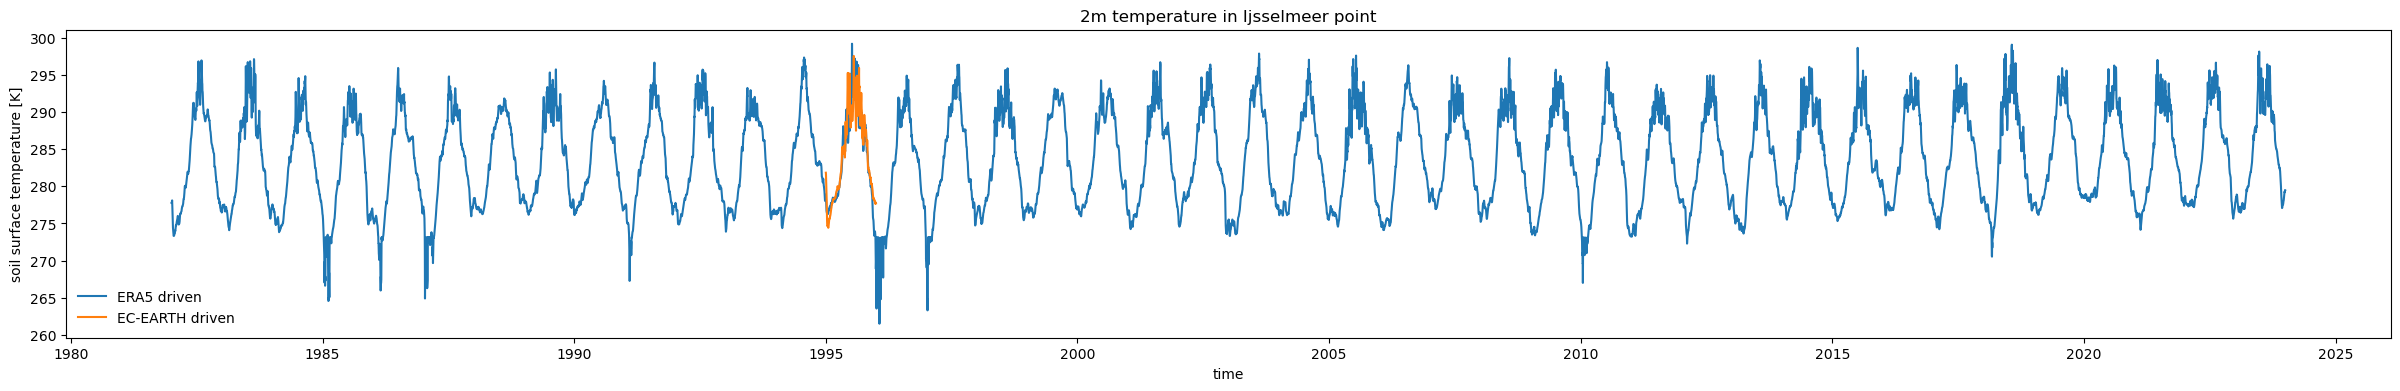

In [27]:
fig,ax = plt.subplots(figsize=(30,4))
da_eval_point.plot(ax=ax, label="ERA5 driven")
da_exp_point.plot(ax =ax, label="EC-EARTH driven")

ax.legend(frameon=False)
ax.set_title("surface temperature in Ijsselmeer point")

/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/CB2_CCLM_BEL28_EC-Earth_test/T_2M/daily/T_2M_daily_mean_1995.nc
['/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/CB2_CCLM_BEL28_ERA5_evaluation/T_2M/daily/T_2M_daily_mean_1982.nc', '/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/CB2_CCLM_BEL28_ERA5_evaluation/T_2M/daily/T_2M_daily_mean_1983.nc', '/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/CB2_CCLM_BEL28_ERA5_evaluation/T_2M/daily/T_2M_daily_mean_1984.nc', '/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/CB2_CCLM_BEL28_ERA5_evaluation/T_2M/daily/T_2M_daily_mean_1985.nc', '/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/CB2_CCLM_BEL28_ERA5_evaluation/T_2M/daily/T_2M_daily_mean_1986.nc', '/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/CB2_CCLM_BEL28_ERA5_evaluation/T_2M/daily/T

Text(0.5, 1.0, '2m temperature in Ijsselmeer point')

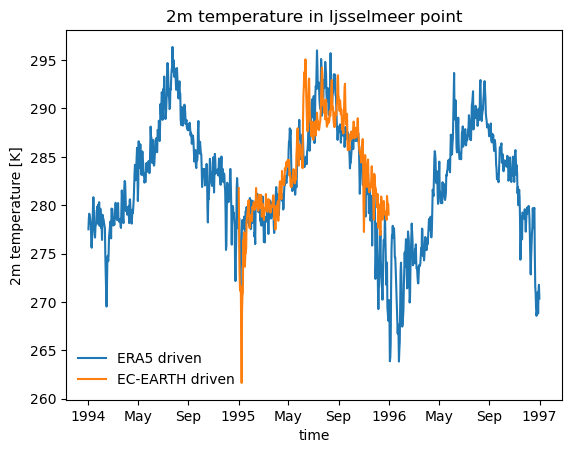

In [30]:
variable = "T_2M" #"T_2M" #
daily_statistic = "mean"

# load and preprocess experiments

da_exp  = load_gcm_experiment(experiment,variable,daily_statistic)
da_eval = load_era5_experiment(experiment_era5,variable,daily_statistic)


rlat_rlon_ijsselmeer = [46.3708,-0.482538]


da_exp_point = da_exp.sel(
            rlat=rlat_rlon_ijsselmeer[0], rlon=rlat_rlon_ijsselmeer[1], method="nearest")
da_eval_point = da_eval.sel(
            rlat=rlat_rlon_ijsselmeer[0], rlon=rlat_rlon_ijsselmeer[1], method="nearest")         

x,y=155,243
da_exp_point = da_exp.isel(
            rlat=y, rlon=x)
da_eval_point = da_eval.isel(
            rlat=y, rlon=x)         


fig,ax = plt.subplots()
da_eval_point.sel(time=slice("1994-01-01","1996-12-31")).plot(ax=ax, label="ERA5 driven")
da_exp_point.sel(time=slice("1994-01-01","1996-12-31")).plot(ax =ax, label="EC-EARTH driven")

ax.legend(frameon=False)
ax.set_title("2m temperature in Ijsselmeer point")

Text(0.5, 1.0, '2m temperature in Ijsselmeer point')

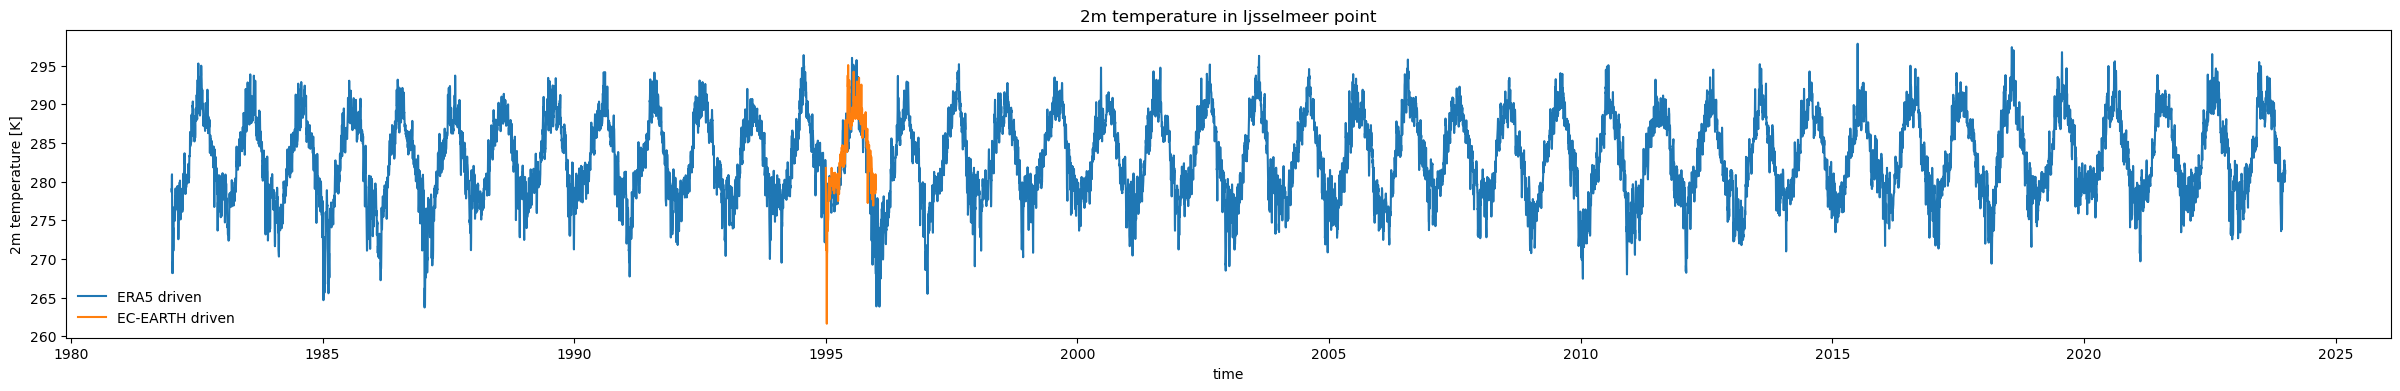

In [31]:
fig,ax = plt.subplots(figsize=(30,4))
da_eval_point.plot(ax=ax, label="ERA5 driven")
da_exp_point.plot(ax =ax, label="EC-EARTH driven")

ax.legend(frameon=False)
ax.set_title("2m temperature in Ijsselmeer point")

array(297.556, dtype=float32)

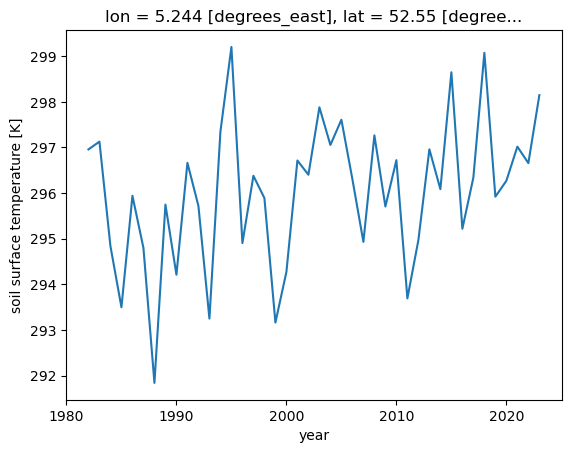

In [28]:
da_eval_point.groupby('time.year').max().plot()
da_exp_point.max(dim='time').values

array(274.42136, dtype=float32)

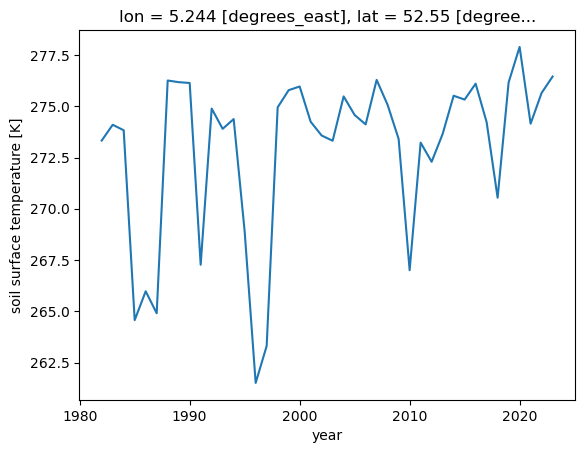

In [29]:
da_eval_point.groupby('time.year').min().plot()
da_exp_point.min(dim='time').values

## City grid cells in EC-EARTH EURO-CORDEX

In [ ]:
# Define datasets
gcm = 'EC-Earth'
domain = 'EUR11'
model = "CCLM"
experiment_type = "test"
experiment = f"CB2_{model}_{domain}_{gcm}_{experiment_type}"

experiment_era5 = f"CB2_{model}_{domain}_ERA5_evaluation"

figdir = "../../output/figures_gcm_evaluation/"
figdir_exp = figdir + f"{experiment}/"
Path(figdir_exp).mkdir(parents=True, exist_ok=True)

In [ ]:
variable = "T_2M"
daily_statistic = "mean"

# load and preprocess experiments

da_exp  = load_gcm_experiment(experiment,variable,daily_statistic)
da_eval = load_era5_experiment(experiment_era5,variable,daily_statistic)


In [ ]:
# select Moscou
lon_lat_point = 
ds_point_exp = select_point(ds_exp, lon_lat_point, rotated_pole=True)